Importing Modules/Dependencies for Data Handling

In [56]:
import numpy as np
import pandas as pd

Reading Training and Testing Data Sets (Downloaded from https://www.kaggle.com/datasets/kartik2112/fraud-detection?select=fraudTrain.csv)

In [57]:
credit_data = pd.read_csv('fraudTrain.csv')
test_data = pd.read_csv('fraudTest.csv')

In [58]:
# first 5 rows of the dataset
credit_data.head()

# last 5 rows of the dataset
credit_data.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [59]:
# Getting info on the data n the data set
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [60]:
def preprocessing(data) :
  # deleting useless columns
  del_col = ['merchant','first','last','street','zip','unix_time','Unnamed: 0','trans_num','cc_num']
  data.drop(columns=del_col,inplace=True)

  # converting data-time features from object type to Numerical value
  data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
  data['trans_date'] = data['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
  data['trans_date'] = pd.to_datetime(data['trans_date'])
  data['dob'] = pd.to_datetime(data['dob'])

  data["age"] = (data["trans_date"] - data["dob"]).dt.days

  data['trans_month'] = data['trans_date'].dt.month
  data['trans_year'] = data['trans_date'].dt.year

  # using one-hot encoding for categorical data features
  data['gender'] = data['gender'].apply(lambda x : 1 if x=='M' else 0)
  data['gender'] = data['gender'].astype(int)
  data['lat_dis'] = abs(data['lat']-data['merch_lat'])
  data['long_dis'] = abs(data['long']-data['merch_long'])
  data = pd.get_dummies(data,columns=['category'])
  data = data.drop(columns=['city','trans_date_trans_time','state','job','merch_lat','merch_long','lat','long','dob','trans_date'])

  # returning the preprocessed dataset
  return data

# performing data p

In [61]:
# performing data preprocessing on credit_data (Training Data) and test_data
credit_data = preprocessing(credit_data.copy())
test_data = preprocessing(test_data.copy())

In [62]:
# Checking data after preprocessing
credit_data.head()

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,lat_dis,long_dis,category_entertainment,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,3495,0,11255,1,2019,0.067507,0.870215,False,...,False,False,False,False,True,False,False,False,False,False
1,107.23,0,149,0,14804,1,2019,0.271247,0.024038,False,...,True,False,False,False,False,False,False,False,False,False
2,220.11,1,4154,0,20801,1,2019,0.969904,0.107519,True,...,False,False,False,False,False,False,False,False,False,False
3,45.00,1,1939,0,18982,1,2019,0.803731,0.447271,False,...,False,False,False,False,False,False,False,False,False,False
4,41.96,1,99,0,11967,1,2019,0.254299,0.830441,False,...,False,False,False,False,False,True,False,False,False,False


In [63]:
# Checking the data features, every feature is in numeric data type
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  int64  
 2   city_pop                 1296675 non-null  int64  
 3   is_fraud                 1296675 non-null  int64  
 4   age                      1296675 non-null  int64  
 5   trans_month              1296675 non-null  int32  
 6   trans_year               1296675 non-null  int32  
 7   lat_dis                  1296675 non-null  float64
 8   long_dis                 1296675 non-null  float64
 9   category_entertainment   1296675 non-null  bool   
 10  category_food_dining     1296675 non-null  bool   
 11  category_gas_transport   1296675 non-null  bool   
 12  category_grocery_net     1296675 non-null  bool   
 13  category_grocery_pos     1296675 non-null 

In [64]:
# creating correlation matrix
correlation_matrix = credit_data.corr()

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

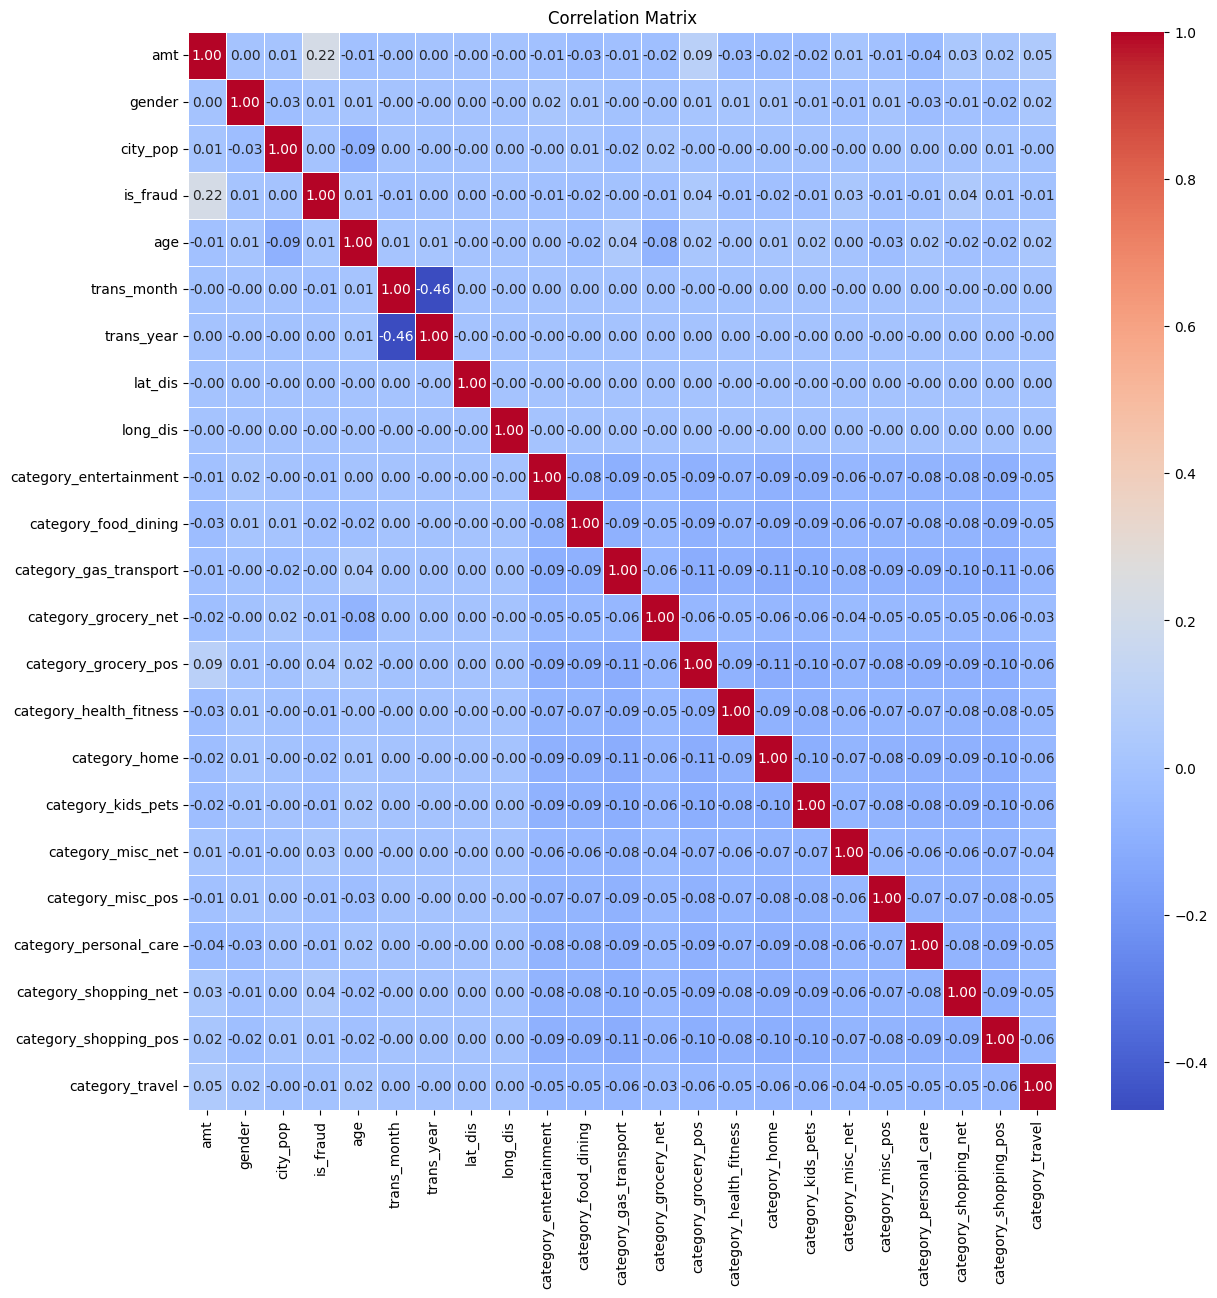

In [66]:
# plotting the correation matrix
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Observation : All the data features have low correlation making every fature less and equally important for the prediction,
# except the amount of transaction (amt)

In [67]:
# Counting the number of legit and fraud transaction data in dataset
credit_data['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [68]:
# separating the data for analysis
legit = credit_data[credit_data.is_fraud == 0]
fraud = credit_data[credit_data.is_fraud == 1]

In [69]:
# priting their shape
print(legit.shape)
print(fraud.shape)

(1289169, 23)
(7506, 23)


In [70]:
# statistical measures of the legit transaction data
legit.amt.describe()

count    1.289169e+06
mean     6.766711e+01
std      1.540080e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.728000e+01
75%      8.254000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [71]:
# statistical measures of the frad transaction data
fraud.amt.describe()

count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64

In [72]:
# compare the values for both transactions
credit_data.groupby('is_fraud').mean()

,amt,gender,city_pop,age,trans_month,trans_year,lat_dis,long_dis,category_entertainment,category_food_dining,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
is_fraud,,,,,,,,,,,,,,,,,,,,,
0,67.667110,0.452261,88775.228137,16794.236578,6.145386,2019.286649,0.500249,0.500341,0.072745,0.070829,...,0.094553,0.066513,0.095346,0.087495,0.048382,0.061594,0.07023,0.074335,0.089848,0.031331
1,531.320092,0.502398,97276.763256,17821.821876,5.586331,2019.304556,0.502739,0.499577,0.031042,0.020117,...,0.232214,0.017719,0.026379,0.031841,0.121902,0.033307,0.02931,0.228217,0.112310,0.015454


In [73]:
# creating a sample legit data set of same size as that of fraud dataset
legit_sample = legit.sample(n=7506)

In [74]:
# joining the legit and fraud data set
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [75]:
# checking the new dataset
new_dataset.head()

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,lat_dis,long_dis,category_entertainment,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
39842,88.65,1,25459,0,18233,1,2019,0.362992,0.656702,False,...,True,False,False,False,False,False,False,False,False,False
718638,1.62,0,1909,0,23814,11,2019,0.397240,0.341693,False,...,False,False,False,False,True,False,False,False,False,False
1129368,75.35,1,737,0,12044,4,2020,0.581980,0.278189,False,...,False,True,False,False,False,False,False,False,False,False
74948,64.11,0,276,0,32790,2,2019,0.108671,0.541689,False,...,False,False,False,False,False,False,False,False,False,False
206838,4.80,0,85,0,12644,4,2019,0.851432,0.141785,False,...,False,False,False,False,False,False,False,False,False,True


In [76]:
new_dataset.tail()

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,lat_dis,long_dis,category_entertainment,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
1295399,977.01,0,105638,1,12464,6,2020,0.744314,0.431289,False,...,False,False,False,False,False,False,False,True,False,False
1295491,1210.91,0,105638,1,12464,6,2020,0.583707,0.547452,False,...,False,False,False,False,False,False,False,True,False,False
1295532,10.24,1,71335,1,9518,6,2020,0.758544,0.458932,False,...,False,False,False,False,False,False,False,False,False,False
1295666,21.69,0,23,1,18542,6,2020,0.815372,0.743649,False,...,False,False,False,False,False,False,False,False,False,False
1295733,10.20,1,71335,1,9518,6,2020,0.904252,0.970391,False,...,False,False,False,False,False,False,False,False,False,False


In [77]:
# checking the count of legit and fraud transaction datasets in new dataset
new_dataset['is_fraud'].value_counts()

is_fraud
0    7506
1    7506
Name: count, dtype: int64

In [78]:
X_train = new_dataset.drop(columns='is_fraud', axis=1)
Y_train = new_dataset['is_fraud']

X_test = test_data.drop(columns='is_fraud', axis=1)
Y_test = test_data['is_fraud']


feature_columns = X_train.columns

In [79]:
# printing the features
print(X_train)

             amt  gender  city_pop    age  trans_month  trans_year   lat_dis  \
39842      88.65       1     25459  18233            1        2019  0.362992   
718638      1.62       0      1909  23814           11        2019  0.397240   
1129368    75.35       1       737  12044            4        2020  0.581980   
74948      64.11       0       276  32790            2        2019  0.108671   
206838      4.80       0        85  12644            4        2019  0.851432   
...          ...     ...       ...    ...          ...         ...       ...   
1295399   977.01       0    105638  12464            6        2020  0.744314   
1295491  1210.91       0    105638  12464            6        2020  0.583707   
1295532    10.24       1     71335   9518            6        2020  0.758544   
1295666    21.69       0        23  18542            6        2020  0.815372   
1295733    10.20       1     71335   9518            6        2020  0.904252   

         long_dis  category_entertainme

In [80]:
# printing the target
print(Y_train)

39842      0
718638     0
1129368    0
74948      0
206838     0
          ..
1295399    1
1295491    1
1295532    1
1295666    1
1295733    1
Name: is_fraud, Length: 15012, dtype: int64


In [81]:
print(X_test)

           amt  gender  city_pop    age  trans_month  trans_year   lat_dis  \
0         2.86       1    333497  19087            6        2020  0.020491   
1        29.84       0       302  11113            6        2020  0.870202   
2        41.28       0     34496  18141            6        2020  0.177090   
3        60.05       1     54767  12020            6        2020  0.242698   
4         3.19       1      1126  23727            6        2020  0.706248   
...        ...     ...       ...    ...          ...         ...       ...   
555714   43.77       1       519  20045           12        2020  0.546263   
555715  111.84       1     28739   7675           12        2020  0.621749   
555716   86.88       0      3684  14277           12        2020  0.461740   
555717    7.99       1       129  20105           12        2020  0.154975   
555718   38.13       1    116001  10097           12        2020  0.543597   

        long_dis  category_entertainment  category_food_dining 

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [121]:
from sklearn.preprocessing import StandardScaler


X_train = pd.DataFrame(X_train, columns=feature_columns)
X_test = pd.DataFrame(X_test, columns=feature_columns)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy: 0.950080886203279

Confusion Matrix:
[[526411  27163]
 [   578   1567]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.05      0.73      0.10      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.84      0.54    555719
weighted avg       1.00      0.95      0.97    555719



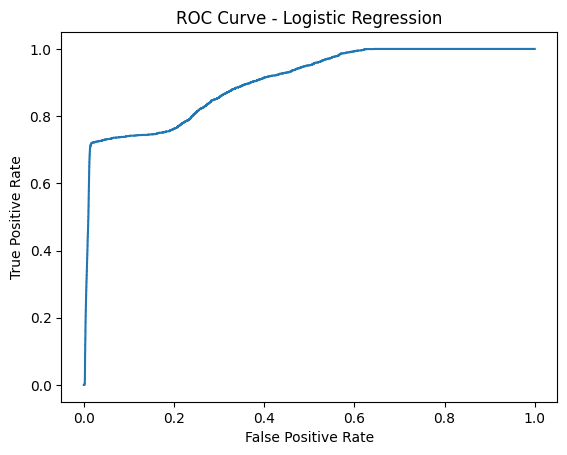

AUC Score: 0.9028183167076974


In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train model
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train_scaled, Y_train)

# Prediction (USE SCALED DATA)
y_pred_logistic = logistic_regression.predict(X_test_scaled)

# Accuracy
accuracy_logistic = accuracy_score(Y_test, y_pred_logistic)
print("Accuracy:", accuracy_logistic)

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred_logistic))

# Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_logistic))

# ROC-AUC (USE SCALED DATA)
y_prob = logistic_regression.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
auc_score = roc_auc_score(Y_test, y_prob)

plt.plot(fpr, tpr)
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print("AUC Score:", auc_score)

In [106]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=10,
    class_weight='balanced',
    random_state=42
)

DecisionTree.fit(X_train_scaled, Y_train)

y_pred_dt = DecisionTree.predict(X_test_scaled)

print("Accuracy:", accuracy_score(Y_test, y_pred_dt))
print(confusion_matrix(Y_test, y_pred_dt))
print(classification_report(Y_test, y_pred_dt))

Accuracy: 0.9547199213991244
[[528482  25092]
 [    71   2074]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98    553574
           1       0.08      0.97      0.14      2145

    accuracy                           0.95    555719
   macro avg       0.54      0.96      0.56    555719
weighted avg       1.00      0.95      0.97    555719



In [99]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

random_forest.fit(X_train_scaled, Y_train)

y_pred_rf = random_forest.predict(X_test_scaled)

print("Accuracy:", accuracy_score(Y_test, y_pred_rf))
print(confusion_matrix(Y_test, y_pred_rf))
print(classification_report(Y_test, y_pred_rf))

Accuracy: 0.9805585196835092
[[542935  10639]
 [   165   1980]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.16      0.92      0.27      2145

    accuracy                           0.98    555719
   macro avg       0.58      0.95      0.63    555719
weighted avg       1.00      0.98      0.99    555719



In [108]:
print("\nClassification Report for Logistic Regression:\n", classification_report(Y_test, y_pred_logistic))
print("\nClassification Report for Decision Tree:\n", classification_report(Y_test, y_pred_dt))
print("\nClassification Report for Random Forest:\n", classification_report(Y_test, y_pred_rf))


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.05      0.73      0.10      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.84      0.54    555719
weighted avg       1.00      0.95      0.97    555719


Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98    553574
           1       0.08      0.97      0.14      2145

    accuracy                           0.95    555719
   macro avg       0.54      0.96      0.56    555719
weighted avg       1.00      0.95      0.97    555719


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.16      0.92      0.27      2145

    accuracy                           0.98    

In [109]:
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd

# Convert classification reports to dictionary
log_report = classification_report(Y_test, y_pred_logistic, output_dict=True)
dt_report = classification_report(Y_test, y_pred_dt, output_dict=True)
rf_report = classification_report(Y_test, y_pred_rf, output_dict=True)

# Calculate ROC-AUC using SCALED test data
log_auc = roc_auc_score(Y_test, logistic_regression.predict_proba(X_test_scaled)[:, 1])
dt_auc = roc_auc_score(Y_test, DecisionTree.predict_proba(X_test_scaled)[:, 1])
rf_auc = roc_auc_score(Y_test, random_forest.predict_proba(X_test_scaled)[:, 1])

# Create comparison table
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Precision (Fraud)": [
        log_report['1']['precision'],
        dt_report['1']['precision'],
        rf_report['1']['precision']
    ],
    "Recall (Fraud)": [
        log_report['1']['recall'],
        dt_report['1']['recall'],
        rf_report['1']['recall']
    ],
    "F1-Score (Fraud)": [
        log_report['1']['f1-score'],
        dt_report['1']['f1-score'],
        rf_report['1']['f1-score']
    ],
    "ROC-AUC": [log_auc, dt_auc, rf_auc]
})

comparison

,Model,Precision (Fraud),Recall (Fraud),F1-Score (Fraud),ROC-AUC
0,Logistic Regression,0.054542,0.730536,0.101506,0.902818
1,Decision Tree,0.076345,0.966900,0.141517,0.985966
2,Random Forest,0.156906,0.923077,0.268220,0.994114


In [120]:
# Create Input Data
input_data = pd.DataFrame({
    'Unnamed: 0': [1],
    'trans_date_trans_time': ['2022-01-01 12:00:00'],
    'cc_num': [1234567890123456],
    'merchant': ['ExampleMerchant'],
    'category': ['ExampleCategory'],
    'amt': [150.0],
    'first': ['John'],
    'last': ['Doe'],
    'gender': ['M'],
    'street': ['123 Example St'],
    'city': ['ExampleCity'],
    'state': ['EX'],
    'zip': [12345],
    'lat': [40.7128],
    'long': [-74.0060],
    'city_pop': [100000],
    'job': ['ExampleJob'],
    'dob': ['1990-01-01'],
    'trans_num': ['ExampleTransNum'],
    'unix_time': [1609459200],
    'merch_lat': [40.730610],
    'merch_long': [-73.935242],
})

# Preprocess
input_data = preprocessing(input_data.copy())

# Add Missing Columns
for col in feature_columns:
    if col not in input_data.columns:
        input_data[col] = 0

# Ensure Correct Order
input_data = input_data[feature_columns]

# Scale using same scaler
input_data_scaled = scaler.transform(input_data)

# Predict
prediction = random_forest.predict(input_data_scaled)

if prediction[0] == 0:
    print("Legitimate Transaction")
else:
    print("Fraudulent Transaction")

Fraudulent Transaction
